In [1]:
import sys 
import os

%load_ext autoreload
%autoreload 2
SCRIPT_DIR = os.path.dirname(os.path.realpath(__vsc_ipynb_file__))
sys.path.append(os.path.dirname(SCRIPT_DIR))

import matplotlib.pyplot as plt
import matplotlib
from region_extractor import WorldWrapper


wrapper = WorldWrapper("/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4")


INFO - PyMCTranslate Version 363
INFO - Loading level /home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4


In [2]:
coords = sorted(wrapper._mca_coords)

print(wrapper._mca_coord_to_path)
inhabited_times = wrapper.mca_inhabited_times(-3, -4) 
# print(wrapper.chunk_inhibited_time(0, 0))

{(1, -3): '/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4/region/r.1.-3.mca', (16, -17): '/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4/region/r.16.-17.mca', (-1, -2): '/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4/region/r.-1.-2.mca', (4, -8): '/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4/region/r.4.-8.mca', (-8, -2): '/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4/region/r.-8.-2.mca', (-17, -21): '/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4/region/r.-17.-21.mca', (3, -3): '/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4/region/r.3.-3.mca', (8, 3): '/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4/region/r.8.3.mca', (0, -6): '/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4/region/r.0.-6.mca', (11, 0): '/home/kyre/repos/minecraft-world-generator/data/Greenfield v0.5.4/region/r.11.0.mca', (-17, -17): '/home/kyre/rep

INFO - NumExpr defaulting to 16 threads.


(32, 32)


<Axes: >

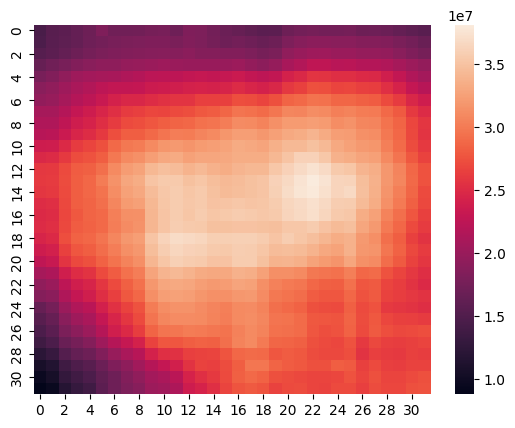

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

print(inhabited_times.shape)
sns.heatmap(inhabited_times)

In [4]:
from tqdm import tqdm

all_inhabited_times = {}
for region_coord in tqdm(coords):
    inhabited_times = wrapper.mca_inhabited_times(region_coord[0], region_coord[1]) 
    all_inhabited_times[region_coord] = inhabited_times


100%|██████████| 356/356 [03:36<00:00,  1.65it/s]


In [ ]:
from tqdm import tqdm

all_biomes = {}
for region_coord in tqdm(coords):
    tmp = wrapper.get_region_volume(region_coord[0], region_coord[1])
    all_biomes[region_coord] = tmp[1]

  0%|          | 0/356 [00:00<?, ?it/s]

  1%|          | 2/356 [00:00<01:07,  5.26it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  1%|          | 4/356 [00:00<00:56,  6.22it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  2%|▏         | 6/356 [00:00<00:53,  6.49it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  2%|▏         | 8/356 [00:01<00:52,  6.65it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  3%|▎         | 10/356 [00:01<00:51,  6.75it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  3%|▎         | 12/356 [00:01<00:50,  6.79it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  4%|▍         | 14/356 [00:02<00:50,  6.82it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  4%|▍         | 16/356 [00:02<00:53,  6.41it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  5%|▌         | 18/356 [00:02<00:51,  6.52it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  6%|▌         | 20/356 [00:03<00:51,  6.59it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  6%|▌         | 22/356 [00:03<00:50,  6.65it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  7%|▋         | 24/356 [00:03<00:49,  6.71it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  7%|▋         | 26/356 [00:03<00:49,  6.72it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  8%|▊         | 28/356 [00:04<00:48,  6.77it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  8%|▊         | 30/356 [00:04<00:50,  6.46it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

  9%|▉         | 32/356 [00:04<00:49,  6.49it/s]

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

ValueError: could not broadcast input array from shape (1,2) into shape (16,16)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Determine the global bounds of your regions
rx_coords = [c[0] for c in coords]
rz_coords = [c[1] for c in coords]

min_rx, max_rx = min(rx_coords), max(rx_coords)
min_rz, max_rz = min(rz_coords), max(rz_coords)

# Calculate dimensions: each region is 512x512 blocks
width = (max_rx - min_rx + 1) * 512
height = (max_rz - min_rz + 1) * 512

# 2. Create a global biome map (initialized to 0 or a "void" ID)
global_biome_map = np.zeros((height, width), dtype=np.uint16)

# 3. Fill the map
for (rx, rz), (blocks, biome_data) in all_biomes.items():
    # Calculate starting pixel position
    # (Subtracting min_rx/rz shifts coordinates to start at index 0)
    x_offset = (rx - min_rx) * 512
    z_offset = (rz - min_rz) * 512
    
    # Place the 512x512 biome array into the global map
    # Note: ensure biome_data is a numpy array for slice assignment
    global_biome_map[x_offset:x_offset+512, z_offset:z_offset+512] = np.array(biome_data)

# 4. Plotting
plt.figure(figsize=(12, 12))
plt.imshow(global_biome_map, cmap='terrain', origin='lower')
plt.colorbar(label='Biome ID')
plt.title(f"Minecraft World Biome Map ({min_rx, min_rz} to {max_rx, max_rz})")
plt.xlabel("X Block Coordinate (Relative)")
plt.ylabel("Z Block Coordinate (Relative)")
plt.show()

In [ ]:
import numpy as np
avg_inhabited_times_per_region = {region: np.nanmean(all_inhabited_times[region]) for region in all_inhabited_times}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 1. Calculate Bounds
rx_coords = [c[0] for c in coords]
rz_coords = [c[1] for c in coords]

min_rx, max_rx = min(rx_coords), max(rx_coords)
min_rz, max_rz = min(rz_coords), max(rz_coords)

# Calculate final pixel dimensions
grid_width = (max_rx - min_rx + 1) * 32
grid_height = (max_rz - min_rz + 1) * 32

# 2. Initialize with NaN (Not a Number) 
# This ensures that "unexplored" areas are transparent/blank
master_grid = np.full((grid_height, grid_width), np.nan, dtype=np.float32)

# 3. Fill the grid
for rx, rz in tqdm(coords, desc="Stitching Regions"):
    data = all_inhabited_times[(rx, rz)]
    
    # Calculate local offsets
    # Mapping: RX -> X axis (columns), RZ -> Z axis (rows)
    z_start = (rz - min_rz) * 32
    x_start = (rx - min_rx) * 32
    
    master_grid[x_start : x_start + 32, z_start : z_start + 32] = data

Stitching Regions: 100%|██████████| 356/356 [00:00<00:00, 267833.58it/s]


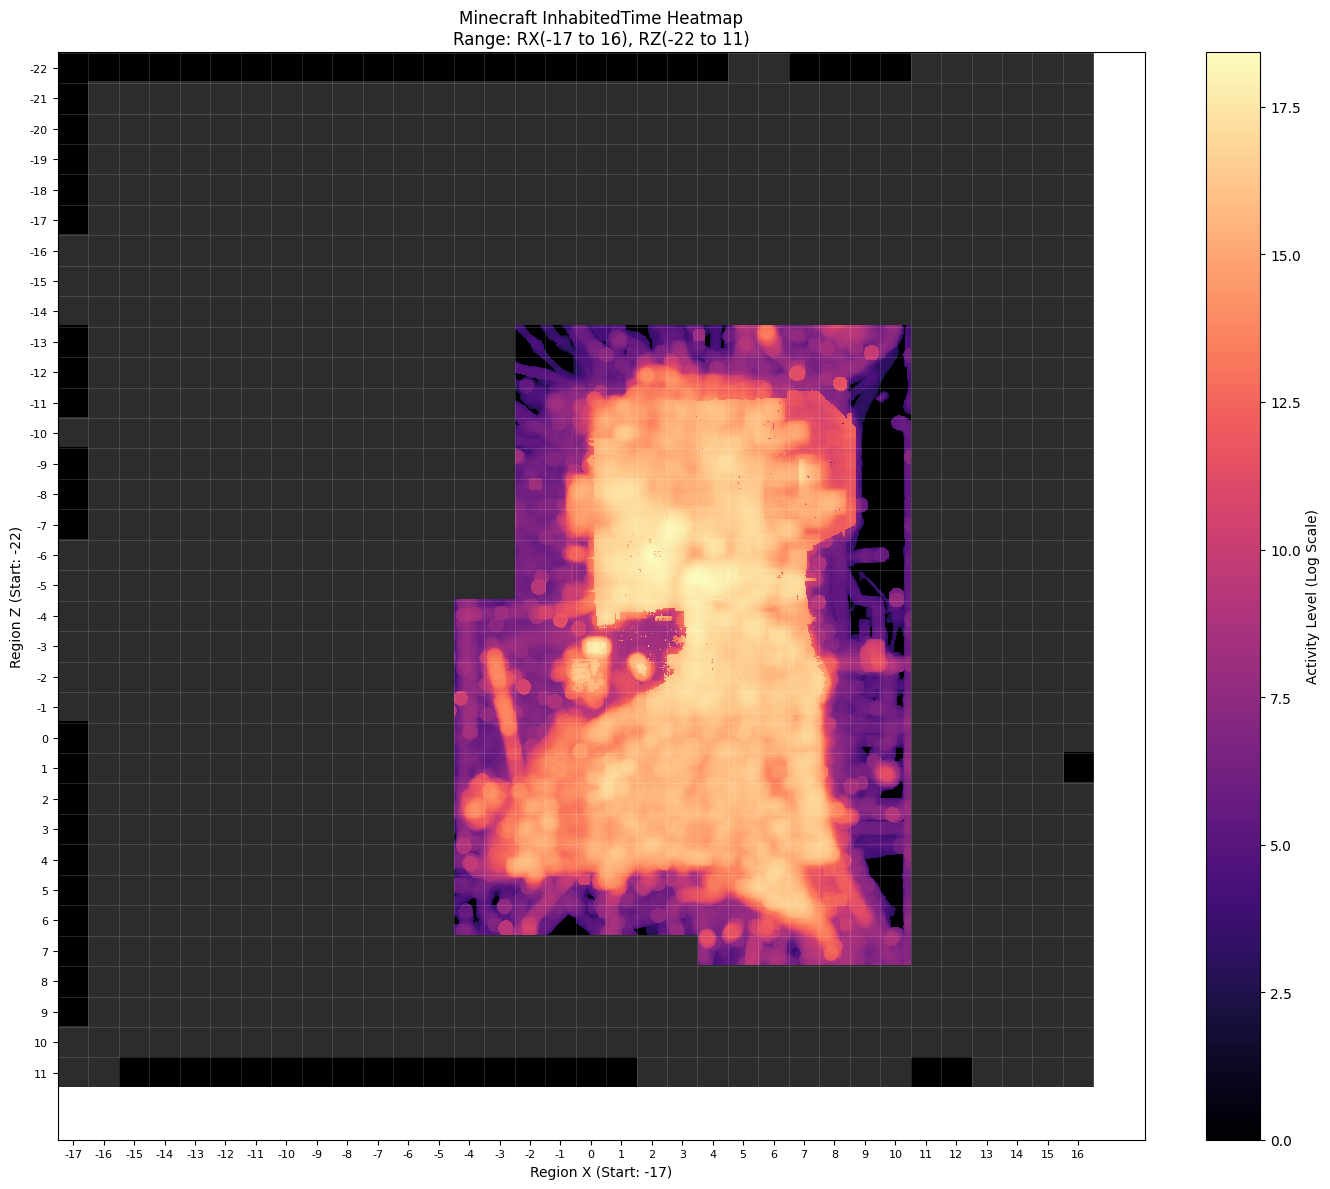

In [ ]:
def plot_tight_heatmap(grid, min_rx, min_rz):
    # Skala logarytmiczna
    # plot_data = np.log1p(grid)

    grid_height, grid_width = grid.shape
    region_size = 32
    num_regions_x = grid_width // region_size
    num_regions_y = grid_height // region_size

    plt.figure(figsize=(16, 12))
    
    current_cmap = plt.cm.magma.copy()
    current_cmap.set_bad(color='#2c2c2c') 

    im = plt.imshow(
        np.log1p(grid), 
        cmap=current_cmap, 
        origin='upper', 
        interpolation='nearest'
    )

    # --- KONFIGURACJA OSI (WSPÓŁRZĘDNE REGIONÓW) ---
    # Pozycje ticków (środek każdego regionu w układzie pikseli)
    xticks_pos = np.arange(region_size / 2, grid_width, region_size)
    yticks_pos = np.arange(region_size / 2, grid_height, region_size)
    
    # Etykiety: startujemy od min_rx/min_rz i dodajemy kolejne indeksy
    xtick_labels = np.arange(min_rx, min_rx + num_regions_x)
    ytick_labels = np.arange(min_rz, min_rz + num_regions_y)

    # Jeśli regionów jest bardzo dużo, wyświetlamy co n-tą etykietę
    step = max(1, num_regions_x // 20) # Automatyczne dopasowanie gęstości
    plt.xticks(xticks_pos[::step], xtick_labels[::step], fontsize=8)
    plt.yticks(yticks_pos[::step], ytick_labels[::step], fontsize=8)
    
    plt.xlabel(f'Region X (Start: {min_rx})', fontsize=10)
    plt.ylabel(f'Region Z (Start: {min_rz})', fontsize=10)

    # --- SIATKA REGIONÓW ---
    plt.vlines(np.arange(0, grid_width + 1, region_size), -0.5, grid_height - 0.5, 
               colors='white', linestyles='-', alpha=0.2, linewidth=0.5)
    plt.hlines(np.arange(0, grid_height + 1, region_size), -0.5, grid_width - 0.5, 
               colors='white', linestyles='-', alpha=0.2, linewidth=0.5)

    plt.colorbar(im, label='Activity Level (Log Scale)', fraction=0.046, pad=0.04)
    plt.title(f"Minecraft InhabitedTime Heatmap\nRange: RX({min_rx} to {min_rx+num_regions_x-1}), RZ({min_rz} to {min_rz+num_regions_y-1})")
    
    plt.tight_layout()
    plt.show()

# Wywołanie funkcji:
plot_tight_heatmap(master_grid, min_rx, min_rz)

In [ ]:
region = wrapper.get_region_volume(0, 0)

TypeError: 'NoneType' object is not iterable

In [ ]:
print(region[1][1000])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(wrapper.mca_coords)

((1, -3), (-1, -2), (-1, 3), (1, 3), (1, 1), (-2, -1), (1, 0), (-4, -1), (2, 4), (-3, 2), (-3, 1), (-2, 0), (-4, 3), (2, 2), (-3, 5), (-1, 4), (0, 3), (3, 1), (-4, 4), (-5, 1), (-4, -2), (1, 4), (0, 2), (-4, 2), (1, -1), (0, 1), (-4, 0), (2, -2), (0, -3), (-4, 1), (-2, 4), (2, 1), (-3, -3), (-1, 0), (-3, 0), (-4, -3), (0, 0), (-1, -3), (-3, 3), (-5, -1), (2, 3), (-2, 5), (-2, -2), (0, -1), (-1, 1), (1, 2), (0, -2), (-2, 2), (-2, 3), (3, 0), (2, -1), (-3, 4), (-1, 5), (-1, 2), (-2, 1), (0, 5), (2, 0), (-2, -3), (-5, -2), (-5, 0), (1, 5), (-3, -1), (-5, 3), (-1, -1), (3, -1), (0, 4), (-3, -2), (3, 2), (1, -2), (-5, 2), (3, 3))


In [ ]:

print(wrapper._blockstates._blockstates_dict)

{'universal_minecraft:air': 0, 'universal_minecraft:bedrock[infiniburn="false"]': 1, 'universal_minecraft:stone': 2, 'universal_minecraft:diorite[polished="false"]': 3, 'universal_minecraft:gravel': 4, 'universal_minecraft:andesite[polished="false"]': 5, 'universal_minecraft:diamond_ore': 6, 'universal_minecraft:granite[polished="false"]': 7, 'universal_minecraft:redstone_ore[lit="false"]': 8, 'universal_minecraft:iron_ore': 9, 'universal_minecraft:coal_ore': 10, 'universal_minecraft:dirt': 11, 'universal_minecraft:lapis_ore': 12, 'universal_minecraft:gold_ore': 13, 'universal_minecraft:water[falling="false",flowing="true",level="0"]': 14, 'universal_minecraft:water[falling="false",flowing="false",level="0"]': 15, 'universal_minecraft:sand': 16, 'universal_minecraft:clay': 17, 'universal_minecraft:coarse_dirt': 18, 'universal_minecraft:water[falling="true",flowing="true",level="1"]': 19, 'universal_minecraft:water[falling="true",flowing="false",level="0"]': 20, 'universal_minecraft:lav

In [ ]:
import numpy as np
print(region.shape)

ids, cnts = np.unique(region, return_counts=True)
for block_id, count in sorted(zip(ids, cnts), key=lambda x: x[1], reverse=True):
    print(f"Block ID {block_id}: {count} blocks")

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
import blosc2
import time

time_start = time.time()
compressed_region = blosc2.pack_array2(np.ascontiguousarray(region), chunksize=512**3)
time_end = time.time()
print(sys.getsizeof(compressed_region) / (1024 ** 2), "MB")
print(f"Time taken: {time_end - time_start:.4f} seconds")

1.704620361328125 MB
Time taken: 0.0791 seconds


In [ ]:
print(np.unique(region[:,:,0], return_counts=True))

(array([1], dtype=uint16), array([262144]))


In [ ]:
import napari
import numpy as np

import napari
import numpy as np

# 1. Create the viewer first
viewer = napari.Viewer()

# 2. Add your region data
# Note: Napari expects (Z, Y, X) or (Y, X, Z) usually. 
# If it looks 'sideways', use np.transpose(region, (2, 0, 1))
viewer.add_image(region, name='Minecraft Region', interpolation2d="nearest", interpolation3d="nearest", colormap="hsv")
# interpolate inhabited times 32 -> 512 for better visualization
# tmp: np.array = np.kron(inhabited_times, np.ones((16, 16)))
# tmp = tmp[:, :, None]  # add a dummy z-axis
# viewer.add_image(tmp, name='Inhabited Times', colormap="Greys_r", interpolation2d="linear", interpolation3d="linear", blending="multiplicative")


# 3. Start the event loop (this keeps the window open)
napari.run()

INFO - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


In [ ]:
region1 = wrapper.get_region_volume(-6, -3)
region2 = wrapper.get_region_volume(-6, -4)
region3 = wrapper.get_region_volume(-7, -3)
region4 = wrapper.get_region_volume(-7, -4)


WARNING - Could not find translation information for block minecraft:numerical[block_data=8,block_id=2708] to universal in PyMCTranslate.Version(java, (1, 12, 2)). If this is not a vanilla block ignore this message
WARNING - Could not find translation information for block minecraft:numerical[block_data=15,block_id=2708] to universal in PyMCTranslate.Version(java, (1, 12, 2)). If this is not a vanilla block ignore this message
WARNING - Could not find translation information for block minecraft:numerical[block_data=11,block_id=260] to universal in PyMCTranslate.Version(java, (1, 12, 2)). If this is not a vanilla block ignore this message
WARNING - Could not find translation information for block minecraft:numerical[block_data=9,block_id=307] to universal in PyMCTranslate.Version(java, (1, 12, 2)). If this is not a vanilla block ignore this message
WARNING - Could not find translation information for block minecraft:numerical[block_data=11,block_id=307] to universal in PyMCTranslate.Ver

In [ ]:
def pad_to_384(array, target_height=384):
    """Pads the 3rd axis (index 2) with zeros to reach target_height."""
    current_height = array.shape[2]
    pad_amount = target_height - current_height
    
    if pad_amount <= 0:
        return array[:, :, :target_height]  # Crop if somehow taller
    
    # (before, after) tuples for each axis: (Axis 0, Axis 1, Axis 2)
    padding = ((0, 0), (0, 0), (0, pad_amount))
    return np.pad(array, padding, mode='constant', constant_values=0)

def ids_to_rgb(volume):
    """
    volume: integer array of shape (X, Y, Z)
    returns: uint8 RGB array of shape (X, Y, Z, 3)
    """
    unique_ids = np.unique(volume)

    # Build color LUT
    lut = {}
    for uid in unique_ids:
        if uid == 0:
            lut[uid] = (0, 0, 0)  # background stays black
        else:
            rng = np.random.default_rng(seed=int(uid))
            lut[uid] = tuple(rng.integers(0, 256, size=3))

    # Vectorized mapping
    rgb = np.zeros(volume.shape + (3,), dtype=np.uint8)
    for uid, color in lut.items():
        rgb[volume == uid] = color

    return rgb

# 1. Apply padding to all regions before stacking
r1, r2 = pad_to_384(region1), pad_to_384(region2)
r3, r4 = pad_to_384(region3), pad_to_384(region4)

# 2. Stack as normal
top = np.hstack((r1, r2))
bottom = np.hstack((r3, r4))
stitched = np.vstack((top, bottom))

# 3. Add to Napari
# Note: If your data is (X, Z, Y), Napari might show it "flat". 
# You can use 'ndisplay=3' in viewer.add_image to see the volu  me.
print(stitched.shape)
rgb = ids_to_rgb(stitched)
viewer = napari.Viewer()

viewer.add_image(rgb, name='Minecraft Region', interpolation2d="nearest", interpolation3d="nearest",  rgb=True)
napari.run()

(1024, 1024, 384)


In [ ]:
print(np.unique(stitched, return_counts=True))

(array([   0,    1,    2,   11,   15,   35,   45,   46,   47,   48,   49,
         50,   65,   69,   73,   77,   78,  138,  164,  197,  198,  199,
        220,  226,  227,  238,  240,  248,  256,  263,  269,  270,  273,
        279,  282,  295,  296,  300,  301,  302,  306,  307,  321,  323,
        359,  360,  363,  372,  397,  463,  472,  473,  480,  494,  497,
        498,  501,  503,  504,  505,  529,  641,  654,  680,  700,  702,
        704,  710,  717,  719,  726,  729,  774,  776,  797,  887,  888,
        893,  896,  901,  902,  905,  913, 1020, 1046, 1101, 1105, 1106,
       1112, 1157, 1170, 1171, 1181, 1272, 1327, 1342, 1343, 1344, 1345,
       1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356,
       1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367,
       1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378,
       1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389],
      dtype=uint16), array([328409288,   1051376,